# Libraries

#### Data exploration and visualization

In [ ]:
import sys
sys.path.append('D:\Programación\soil_desertification\src')
from utils.utilities import *

In [1]:
import os
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from tqdm import tqdm as tqdm

#### Raster manipulation

In [2]:
import rasterio as rio
from rasterio import warp, mask, features
from rasterio.windows import Window
from rasterio.plot import show, reshape_as_image, adjust_band, reshape_as_raster

#### Manipulate polygons.

In [3]:
from pyproj import Proj, Transformer, transform
#from shapely.geometry import Polygon

#### Geospatial data processing

In [4]:
from glob import glob
from osgeo import gdal, ogr, osr

# Raster exploration

#### Label paths and rasters

In [5]:
label_path = '../data/images/raw/labels/sentinel/17M_20210101-20220101.tif'
raster_path = '../data/images/processed/products/S2/S2_A_2016.tif'

#### Label image processing

In [7]:
dataset_labels = open_raster(label_path)

Numero de bandas en la imagen: 1

Tamaño de la imagen es: 88550 filas x 66794 columnas

Raster driver: GTiff

Proyeccion de Imagen:
PROJCS["WGS 84 / UTM zone 17S",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-81],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [8]:
windows = Window(col_off=30000, row_off=30000, width=30000, height=30000)
labels_image = read_raster(dataset_labels, windows)

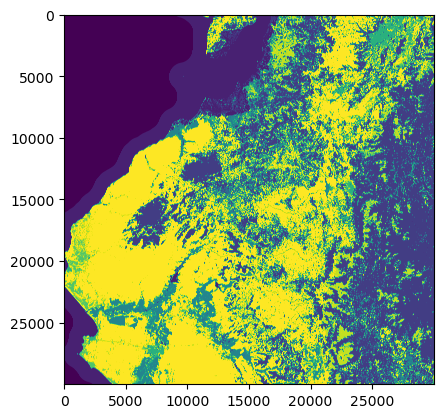

<Axes: >

In [9]:
show(labels_image)

##### Number of samples per class

In [10]:
data_list = samples_by_class(labels_image, class_names_s2)
data_list

[('Sin Clasificar', 112904838),
 ('Agua', 76001263),
 ('Árboles', 265392908),
 ('Vegetación inundada', 187641),
 ('Cultivos', 30233276),
 ('Área Construida', 19246535),
 ('Suelo desnudo', 14562790),
 ('Nieve/hielo', 24),
 ('Nubes', 37602253),
 ('Pastizales', 343868472)]

In [11]:
percentage_by_class(labels_image, class_names_s2)

Agua:  0.10
Árboles:  0.34
Vegetación inundada:  0.00
Cultivos:  0.04
Área Construida:  0.02
Suelo desnudo:  0.02
Nieve/hielo:  0.00
Nubes:  0.05
Pastizales:  0.44


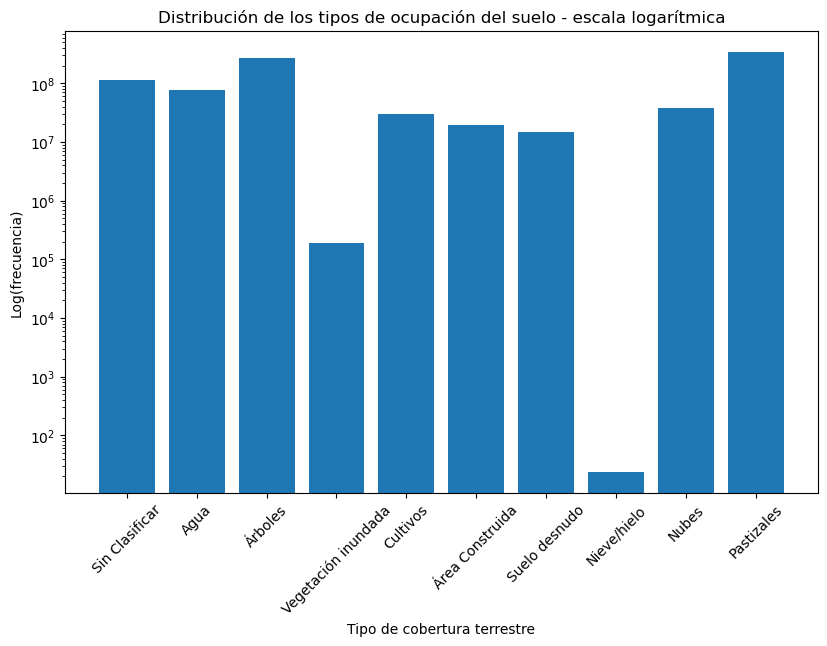

In [12]:
distribution_of_land(data_list)

#### Combined label image

In [13]:
labels_merge = merge_classes(labels_image, reclassification_s2)

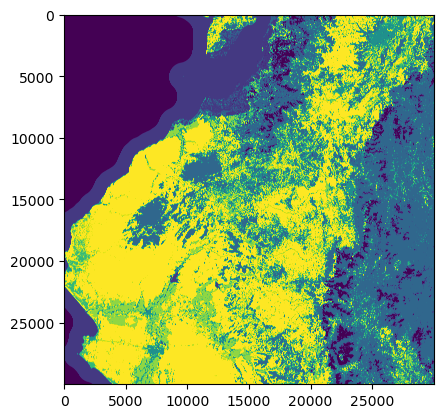

<Axes: >

In [14]:
show(labels_merge)

##### Number of samples per class mixed

In [15]:
data_list = samples_by_class(labels_merge, merge_class_names_s2)
data_list

[('Sin Clasificar', 150507115),
 ('Agua', 76001263),
 ('Arboles', 265392908),
 ('Area Construida', 19246535),
 ('Suelo desnudo', 14562790),
 ('Cultivos', 30420917),
 ('Pastizales', 343868472)]

In [16]:
percentage_by_class(labels_merge, merge_class_names_s2)

Agua:  0.10
Arboles:  0.35
Area Construida:  0.03
Suelo desnudo:  0.02
Cultivos:  0.04
Pastizales:  0.46


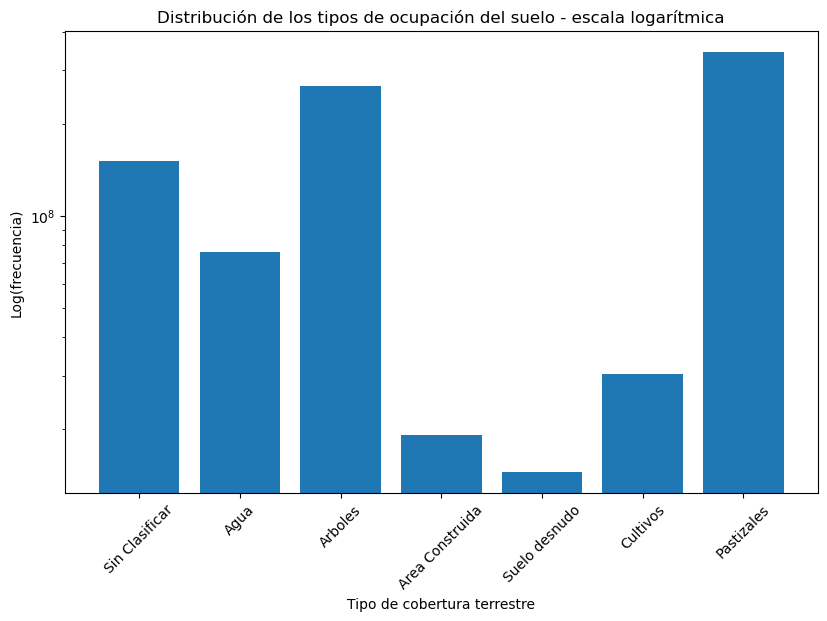

In [17]:
distribution_of_land(data_list)

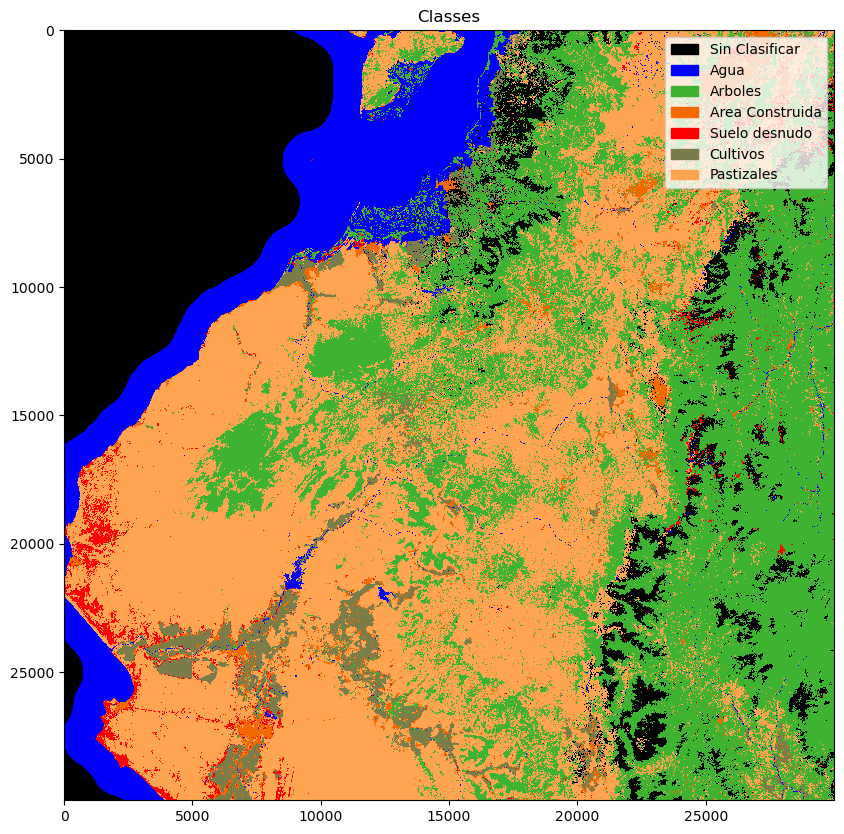

In [18]:
plot_merge_class(labels_merge, colors_s2, merge_class_names_s2)